# Neural Networks

Neural networks are a machine learning method inspired by how the human brain works. They are particularly good at pattern recognition and classification tasks, often using images as inputs. They are a well-established machine learning technique, having been around since the 1950s, but they've gone through several iterations to overcome limitations in previous generations. Using state-of-the-art neural networks is often referred to as 'deep learning'.

## Perceptrons

Perceptrons are the building blocks of neural networks. They are an artificial version of a single neuron in the brain. They typically have one or more inputs and a single output. Each input will be multiplied by a weight and the value of all the weighted inputs are then summed together. Finally, the summed value is put through an activation function which decides if the neuron "fires" a signal. In some cases, this activation function is simply a threshold step function which outputs zero below a certain input and one above it. Other designs of neurons use other activation functions, but typically they have an output between zero and one and are still step-like in their nature.

![A diagram of a perceptron](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn/gh-pages/fig//perceptron.svg)

### Coding a perceptron

Below is an example of a perceptron written as a Python function. The function takes three parameters: `Inputs` is a list of input values, `Weights` is a list of weight values and `bias` adjusts the activation threshold (constant added to sum).

First we multiply each input by the corresponding weight. To do this quickly and concisely, we will use the numpy multiply function which can multiply each item in a list by a corresponding item in another list.

We then take the sum of all the inputs multiplied by their weights. Finally, if this value is less than the activation threshold, we output zero, otherwise we output a one.

In [1]:
import numpy as np
def perceptron(inputs, weights, bias):

    assert len(inputs) == len(weights)

    # multiply the inputs and weights
    values = np.multiply(inputs,weights)

    # sum the results
    total = sum(values) + bias

    # Note: you could also just use np.dot() to do the mumltiplication and sum in one step.

    # decide if we should activate the perceptron
    if total >= 0:
        return 1
    else:
        return 0

### Computing with a perceptron

A single perceptron can perform basic linear classification problems such as computing the logical AND, OR, and NOT functions.

OR

| Input 1 | Input 2 | Output |
| --------|---------|--------|
| 0       |0        |0       |
| 0       |1        |1       |
| 1       |0        |1       |
| 1       |1        |1       |

AND

| Input 1 | Input 2 | Output |
| --------|---------|--------|
| 0       |0        |0       |
| 0       |1        |0       |
| 1       |0        |0       |
| 1       |1        |1       |


NOT

| Input 1 |Output |
| --------|--------|
| 0       |1       |
| 1       |0       |


We can get a single perceptron to compute each of these functions

OR:

In [2]:
inputs = [[0,0],[1,0],[0,1],[1,1]]
weights = [0.5,0.5] 
bias = -0.5
for input in inputs:
    print(input,perceptron(input, weights, bias))

[0, 0] 0
[1, 0] 1
[0, 1] 1
[1, 1] 1


AND:

In [3]:
inputs = [[0,0],[1,0],[0,1],[1,1]]
weights = [0.5,0.5] 
bias = -1
for input in inputs:
    print(input,perceptron(input, weights, bias))

[0, 0] 0
[1, 0] 0
[0, 1] 0
[1, 1] 1


NOT:

The NOT function only has a single input. To make it work in the perceptron we need to introduce a bias term which is always the same value. In this example it is the second input. It has a weight of 1.0 while the weight on the real input is -1.0.

In [4]:
inputs = [[0],[1]]
weights = [-1] 
bias = 0

for input in inputs:
    print(input,perceptron(input, weights, bias))

[0] 1
[1] 0


A perceptron can be trained to learn the optimal weights and bias for any function which has linear separability. A simple training algorithm called the perceptron learning algorithm can be used to do this and Scikit-Learn has its own implementation of it. We are going to skip over the perceptron learning algorithm and move straight onto more powerful techniques.

### Perceptron limitations

A single perceptron cannot solve any function that is not linearly separable, meaning that we need to be able to divide the classes of inputs and outputs with a straight line. A common example of this is the XOR function shown below:

| Input 1 | Input 2 | Output |
| --------|---------|--------|
| 0       |0        |0       |
| 0       |1        |1       |
| 1       |0        |1       |
| 1       |1        |0       |

(Make a graph of this)

This function outputs a zero when all its inputs are one or zero and its not possible to separate with a straight line. This is known as linear separability. When this limitation was discovered in the 1960s it effectively halted development of neural networks for over a decade in a period known as the "AI Winter".


## Multi-layer perceptrons

A single perceptron cannot be used to solve a non-linearly separable function. For that, we need to use multiple perceptrons and typically multiple layers of perceptrons. They are formed of networks of artificial neurons which each take one or more inputs and typically have a single output. The neurons are connected together in networks of 10s to 1000s of neurons. Typically, networks are connected in layers with an input layer, middle or hidden layer (or layers), and finally an output layer.

![A multi-layer perceptron](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn/gh-pages/fig//multilayer_perceptron.svg)

### Training multi-layer perceptrons

Multi-layer perceptrons need to be trained by showing them a set of training data and measuring the error between the network's predicted output and the true value. Training takes an iterative approach that improves the network a little each time a new training example is presented. There are a number of training algorithms available for a neural network today, but we are going to use one of the best established and well known, the backpropagation algorithm. This algorithm is called back propagation because it takes the error calculated between an output of the network and the true value and takes it back through the network to update the weights. If you want to read more about back propagation, please see [this chapter](http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf) from the book "Neural Networks - A Systematic Introduction".

### Multi-layer perceptrons in Scikit-Learn

We are going to build a multi-layer perceptron for recognising handwriting from images. Scikit-Learn includes some example handwriting data from the [MNIST data set](http://yann.lecun.com/exdb/mnist/), which is a dataset containing 70,000 images of hand-written digits. Each image is 28x28 pixels in size (784 pixels in total) and is represented in grayscale with values between zero for fully black and 255 for fully white. This means we will need 784 perceptrons in our input layer, each taking the input of one pixel and 10 perceptrons in our output layer to represent each digit we might classify. If trained correctly, only the perceptron in the output layer will "fire" to represent the contents of the image (but this is a massive oversimplification!).

We can import this dataset from `sklearn.datasets` then load it into memory by calling the `fetch_openml` function.

In [5]:
import sklearn.datasets as skl_data
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)

This creates two arrays of data, one called `data` which contains the image data and the other `labels` that contains the labels for those images which will tell us which digit is in the image. A common convention is to call the data `X` and the labels `y`.

As neural networks typically want to work with data that ranges between 0 and 1.0 we need to normalise our data to this range. Python has a shortcut which lets us divide the entire data array by 255 and store the result, we can simply do:

In [6]:
data = data / 255.0

This is instead of writing a loop ourselves to divide every pixel by 255. Although the final result is the same and will take about the same amount of computation (possibly a little less, it might do some clever optimisations).

**Why normalize?** Normalization helps neural networks converge faster by ensuring that features are on a similar scale. When features have vastly different ranges, the loss surface becomes irregular, making optimization harder and increasing the risk of getting stuck in suboptimal local minima.

Now we need to initialise a neural network. Scikit-Learn has an entire library for this (`sklearn.neural_network`) and the `MLPClassifier` class handles multi-layer perceptrons. This network takes a few parameters including the size of the hidden layer, the maximum number of training iterations we're going to allow, the exact algorithm to use, whether or not we'd like verbose output about what the training is doing, and the initial state of the random number generator.

In scikit-learn's `MLPClassifier`, the `hidden_layer_sizes` parameter specifies the number and size of hidden layers in the neural network. For example, `hidden_layer_sizes=(50,)` creates a single hidden layer with 50 neurons, while `(100, 50)` creates two hidden layers with 100 and 50 neurons, respectively. It’s important to include the trailing comma for a single hidden layer (e.g., `(50,)`) because without it, `(50)` would be interpreted as an integer, not a tuple, and cause an error. The example, `MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, verbose=1, random_state=1)`, builds a neural network with one hidden layer containing 50 neurons, runs for a maximum of 50 iterations, logs training progress, and ensures reproducibility with `random_state=1`.

The max_iter parameter in MLPClassifier specifies the maximum number of iterations, not epochs. Since MLPClassifier uses stochastic gradient descent (or its variants), each iteration processes a small random subset of the data (a batch), and the full dataset may not be seen in a single iteration.

In [7]:
# import
import sklearn.neural_network as skl_nn

# init model
mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, verbose=1, random_state=1)


We now have a neural network but we have not trained it yet. Before training, we will split our dataset into two parts: a training set which we will use to train the classifier and a test set which we will use to see how well the training is working. By using different data for the two, we can avoid 'over-fitting', which is the creation of models which do not "generalise" or work with data other than their training data.

Typically, the majority of the data will be used as training data (70-90%), to help avoid overfitting. Let us see how big our dataset is to decide how many samples we want to train with.

In [8]:
data.shape

(70000, 784)

In [9]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This tells us we have 70,000 rows in the dataset.

Let us take 90% of the data for training and 10% for testing, so we will use the first 63,000 samples in the dataset as the training data and the last 7,000 as the test data. 


In [10]:
from sklearn.model_selection import train_test_split

# Assuming `data` is your feature matrix and `labels` is your target vector
X_train, X_test, y_train, y_test = train_test_split(
    data.values,        # Features
    labels.values,      # Labels
    test_size=0.1,      # Reserve 10% of data for testing
    random_state=42     # For reproducibility
)
X_train.shape

(63000, 784)

Now lets train the network. This line will take about one minute to run. We do this by calling the `fit` function inside the `mlp` class instance. This needs two arguments: the data itself, and the labels showing what class each item should be classified to.

In [11]:
# fit/train model
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.50503964
Iteration 2, loss = 0.24156069
Iteration 3, loss = 0.19081748
Iteration 4, loss = 0.16082810
Iteration 5, loss = 0.13878497
Iteration 6, loss = 0.12195098
Iteration 7, loss = 0.10894577
Iteration 8, loss = 0.09876658
Iteration 9, loss = 0.08988907
Iteration 10, loss = 0.08278606
Iteration 11, loss = 0.07554156
Iteration 12, loss = 0.07044946
Iteration 13, loss = 0.06451531
Iteration 14, loss = 0.06043697
Iteration 15, loss = 0.05605789
Iteration 16, loss = 0.05186282
Iteration 17, loss = 0.04898347
Iteration 18, loss = 0.04530910
Iteration 19, loss = 0.04287527
Iteration 20, loss = 0.04020489
Iteration 21, loss = 0.03780149
Iteration 22, loss = 0.03529127
Iteration 23, loss = 0.03395980
Iteration 24, loss = 0.03160348
Iteration 25, loss = 0.02934723
Iteration 26, loss = 0.02786874
Iteration 27, loss = 0.02617684
Iteration 28, loss = 0.02450921
Iteration 29, loss = 0.02303041
Iteration 30, loss = 0.02155746
Iteration 31, loss = 0.02079762
Iteration 32, los

C:\Users\admin2\Desktop\ML_workshop\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,1


This is training a neural network to make predictions by adjusting its internal settings to reduce errors.

The number shown during training is the **loss**, which tells us how far off the model's predictions are.

For classification problems like this, the model uses something called log loss (also known as cross-entropy loss). This loss gets smaller when the model assigns high probability to the correct class.

Finally, we will score the accuracy of our network against both the original training data and the test data. If the training had converged to the point where each iteration of training was not improving the accuracy, then the accuracy of the training data should be 1.0 (100%).

In [12]:
# print train/test scores
print("Training set score", mlp.score(X_train, y_train))
print("Testing set score", mlp.score(X_test, y_test))

Training set score 0.9996507936507937
Testing set score 0.9697142857142858


### Prediction using a multi-layer perceptron

Now that we have trained a multi-layer perceptron, we can give it some input data and ask it to perform a prediction. In this case, our input data is a 28x28 pixel image, which can also be represented as a 784-element list of data. The output will be a number between 0 and 9 telling us which digit the network thinks we have supplied. The `predict` function in the `MLPClassifier` class can be used to make a prediction. Lets use the first digit from our test set as an example.

Before we can pass it to the predictor, we need to extract one of the digits from the test set. We can use `iloc` on the dataframe to get hold of the first element in the test set. In order to present it to the predictor, we have to turn it into a numpy array which has the dimensions of 1x784 instead of 28x28. We can then call the `predict` function with this array as our parameter. This will return an array of predictions (as it could have been given multiple inputs), the first element of this will be the predicted digit. You may get a warning stating "X does not have valid feature names", this is because we didn't encode feature names into our X (digit images) data.

In [13]:
test_digit = X_test[0].reshape(1,784) # current shape is (784,)
test_digit.shape

(1, 784)

In [14]:
# get test_digit_prediction
test_digit_prediction = mlp.predict(test_digit)[0] # predict returns array (of length 1 in this case). We extract first/only element with [0]
print("Predicted value:",test_digit_prediction)

Predicted value: 8


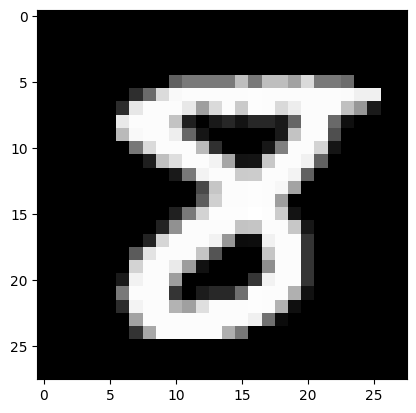

In [15]:
# plot image version
import matplotlib.pyplot as plt
image = test_digit.reshape(28, 28)

# Plot the digit
plt.imshow(image, cmap='gray');


We can also verify if the prediction is correct by looking at the corresponding item in the `y_test` array.

In [16]:
print("Actual value",y_test[0])

Actual value 8


This should be the same value which is being predicted.

### Confusion matrix
We now know what percentage of images were correctly classified, but we don't know anything about the distribution of correct predictions across our different classes (the digits 0 to 9 in this case). A more powerful technique is known as a confusion matrix. Here we draw a grid with each class along both the x and y axis. The x axis is the actual number of items in each class and the y axis is the predicted number. In a perfect classifier, there will be a diagonal line of values across the grid moving from the top left to bottom right corresponding to the number in each class, and all other cells will be zero. If any cell outside of the diagonal is non-zero then it indicates a miss-classification. Scikit-Learn has a function called `confusion_matrix` in the `sklearn.metrics` class which can display a confusion matrix for us. It will need two inputs: arrays showing how many items were in each class for both the real data and the classifications. We already have the real data in the labels_test array, but we need to build it for the classifications by classifying each image (in the same order as the real data) and storing the result in another array.


In [17]:
# extract all test set predictions
y_test_pred = mlp.predict(X_test)
y_test_pred

array(['8', '4', '8', ..., '5', '2', '6'], shape=(7000,), dtype='<U1')

The `ConfusionMatrixDisplay` class in the `sklearn.metrics` package can create a graphical representation of a confusion matrix with colour coding to highlight how many items are in each cell. This colour coding can be useful when working with very large numbers of classes.

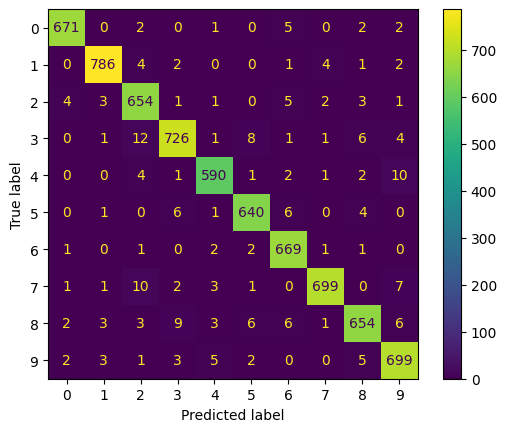

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred);

## Changing the learning parameters
There are several parameters which control the training of the data. One of these is called the learning rate. Increasing this can reduce how many learning iterations we need. But if this is too large you can end up overshooting.
Try tweaking this parameter by adding the parameter `learning_rate_init` with a default value of 0.001. Try increasing it to around 0.1.

In [20]:
mlp_lr = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, verbose=1, random_state=1, learning_rate_init=0.1)
mlp_lr.fit(X_train, y_train)

Iteration 1, loss = 0.59030965
Iteration 2, loss = 0.41145089
Iteration 3, loss = 0.40535804
Iteration 4, loss = 0.44455375
Iteration 5, loss = 0.44813839
Iteration 6, loss = 0.43902116
Iteration 7, loss = 0.44495525
Iteration 8, loss = 0.47060737
Iteration 9, loss = 0.44701607
Iteration 10, loss = 0.44200882
Iteration 11, loss = 0.47927453
Iteration 12, loss = 0.48804999
Iteration 13, loss = 0.50840162
Iteration 14, loss = 0.51371890
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,1


Scikit-learn's MLPClassifier has a built-in convergence check: if the loss doesn't improve by at least tol=0.0001 for 10 steps, it halts training.

A higher learning rate makes updates larger — but that can cause the model to overshoot the optimal values and bounce around. That can make the loss oscillate or even grow worse over time.

#### Generate another consuion matrix
First, calculate train/test scores using `mlp_lr`. Then plot the confusion matrix.

Training set score 0.8945079365079365
Testing set score 0.8801428571428571


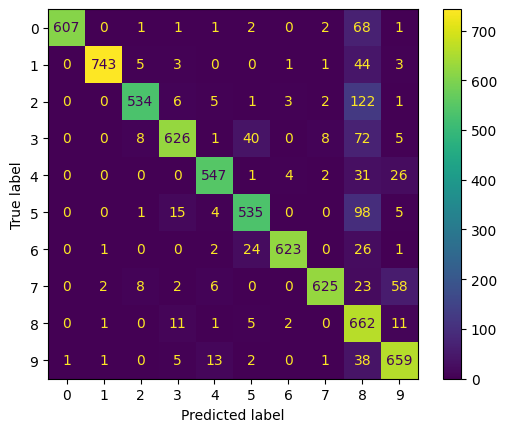

In [21]:
print("Training set score", mlp_lr.score(X_train, y_train))
print("Testing set score", mlp_lr.score(X_test, y_test))

# extract all test set predictions
y_test_pred = mlp_lr.predict(X_test)
y_test_pred

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

## Cross-validation

Previously we split the data into training and test sets. But what if the test set includes important features we want to train on that happen to be missing in the training set? We are throwing away part of our data to use it in the testing set.

Cross-validation runs the training/testing multiple times but splits the data in a different way each time. This means all of the data gets used both for training and testing. We can use multiple iterations of training with different data in each set to eventually include the entire dataset.

example list

[1,2,3,4,5,6,7,8]

train = 1,2,3,4,5,6
test = 7,8

train = 1,2,3,4,7,8
test = 5,6

train = 1,2,5,6,7,8
test = 3,4

train = 3,4,5,6,7,8
test = 1,2

(generate an image of this)

### Code example

The `sklearn.model_selection` module provides support for doing k-fold cross validation in Scikit-Learn. It can automatically partition our data for cross validation.

Import this and call it `skl_msel`

In [22]:
import sklearn.model_selection as skl_msel

Now we can choose how many ways we would like to split our data (3-5 are common choices).

In [23]:
kfold = skl_msel.KFold(3)

Now we can loop through our data and test on each combination. The `kfold.split` function returns two variables and we will have our for loop work through both of them. The train variable will contain a list of which items (by index number) we are currently using to train and the test one will contain the list of which items we are going to test on.

In [24]:
for (train_indices, test_indices) in kfold.split(data):
    # Re-initialize model for each fold (start training from scratch)
    mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, random_state=1)

    # Select data using .iloc since data is a DataFrame
    data_train = data.iloc[train_indices]
    labels_train = labels.iloc[train_indices]

    data_test = data.iloc[test_indices]
    labels_test = labels.iloc[test_indices]

    # Train and evaluate
    mlp.fit(data_train, labels_train)
    print("Training set score:", mlp.score(data_train, labels_train))
    print("Testing set score:", mlp.score(data_test, labels_test))


C:\Users\admin2\Desktop\ML_workshop\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.9995238095238095
Testing set score: 0.9681142857142857


C:\Users\admin2\Desktop\ML_workshop\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.999447619047619
Testing set score: 0.9690285714285715


C:\Users\admin2\Desktop\ML_workshop\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.9996
Testing set score: 0.9677714285714286
Training set score: 0.9996761904761905
Testing set score: 0.9719428571428571


C:\Users\admin2\Desktop\ML_workshop\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Once we have established that the cross validation was ok, we can go ahead and train a final model using the entire dataset by doing `mlp.fit(data,labels)`. We can then use this model for any new data, and be relatively confident that it will do a good job predcting new samples.

In [25]:
# can skip this part for sake of time, or remove comments below to run

# mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, random_state=1, verbose=1)
# mlp.fit(data,labels)

Iteration 1, loss = 0.48113910
Iteration 2, loss = 0.23427976
Iteration 3, loss = 0.18567004
Iteration 4, loss = 0.15418056
Iteration 5, loss = 0.13250212
Iteration 6, loss = 0.11616587
Iteration 7, loss = 0.10288727
Iteration 8, loss = 0.09256882
Iteration 9, loss = 0.08349875
Iteration 10, loss = 0.07617581
Iteration 11, loss = 0.06986540
Iteration 12, loss = 0.06448626
Iteration 13, loss = 0.05965100
Iteration 14, loss = 0.05538264
Iteration 15, loss = 0.05122050
Iteration 16, loss = 0.04837738
Iteration 17, loss = 0.04497173
Iteration 18, loss = 0.04295863
Iteration 19, loss = 0.03974947
Iteration 20, loss = 0.03733302
Iteration 21, loss = 0.03561146
Iteration 22, loss = 0.03289452
Iteration 23, loss = 0.03170113
Iteration 24, loss = 0.02929822
Iteration 25, loss = 0.02810486
Iteration 26, loss = 0.02614949
Iteration 27, loss = 0.02499332
Iteration 28, loss = 0.02329592
Iteration 29, loss = 0.02241539
Iteration 30, loss = 0.02080464
Iteration 31, loss = 0.01966783
Iteration 32, los

C:\Users\admin2\Desktop\ML_workshop\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,1


### Cross-validation for hyperparameter tuning

Perhaps a more common way you'll see cross-validation show up is in the context of searching for ideal hyperparameter settings. Neural networks take time to train, and you typically don't want to test every possible hyperparameter combination. However, we can easily explore a small subset with the following:

In [26]:
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=True)
data = data / 255.0

# Split into train and final test set
data_train, data_test, labels_train, labels_test = skl_msel.train_test_split(
    data, labels, test_size=0.2, random_state=1, stratify=labels
)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (25,)],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [10] # setting this to 10 just to speed up the demo (typically you'd want this number higher)
}

# Initialize base model
mlp = skl_nn.MLPClassifier(random_state=1)

To find good values, we can use GridSearchCV. This tool tries out different combinations of hyperparameters and evaluates each one using cross-validation on the training set. For each combination:

- It splits the training data into multiple folds,
- Trains the model on some folds,
- Validates it on the remaining fold,
- Then averages the scores.

This helps us pick the combination that performs best on unseen data, without using the test set.

Once we've found the best settings, we retrain the model using all of the training data and test it once on the held-out test set. This gives us a fair estimate of how the model might perform on new data.

In [27]:
# Cross-validation + hyperparameter tuning on training set
grid_search = skl_msel.GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=4,                # 4-fold CV on training set only
    n_jobs=-1,
    verbose=2
)

# Fit only on training set
grid_search.fit(data_train, labels_train)

# Show best parameters and best cross-val score (on training folds)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score (on training folds):", grid_search.best_score_)

# Evaluate once on final held-out test set
final_model = grid_search.best_estimator_
test_accuracy = final_model.score(data_test, labels_test)
print("Final test set accuracy:", test_accuracy)



Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 10}
Best cross-validation score (on training folds): 0.9646250000000001
Final test set accuracy: 0.9676428571428571


C:\Users\admin2\Desktop\ML_workshop\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


**Note**: This same procedure can be used to select the hyperparameters of any kind of ML/AI model